In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_airbnb.head()

,latitude,longitude,neighbourhood,bedrooms,cleaning_fee,security_deposit,Free_parking_on_premises,extra_people,Pool,Dryer,...,Crib,Washer,Dishwasher,Suitable_for_events,property_type,Full_kitchen,Internet,Bathtub,Cable_TV,price
id,,,,,,,,,,,,,,,,,,,,,
32046194,-22.98538,-43.19582,0,2.0,73.0,0.0,0,49.0,0,0,...,0,0,0,0,0,0,0,0,0,395.0
2060895,-22.91544,-43.18171,1,1.0,35.0,0.0,0,25.0,0,0,...,0,1,0,1,1,0,1,0,0,84.0
8067388,-22.95565,-43.19536,2,2.0,160.0,0.0,0,90.0,0,0,...,0,1,0,0,0,0,1,0,1,382.0
26081807,-22.98617,-43.22759,3,1.0,120.0,1200.0,0,100.0,0,0,...,0,0,0,0,0,0,0,0,1,151.0
31051808,-22.94991,-43.19289,2,3.0,150.0,0.0,0,70.0,0,0,...,0,1,0,0,0,0,0,0,0,348.0


In [14]:
df_anuncios = pd.read_csv('anuncios.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_anuncios.head()

,host_name,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
32046194,Allan,within an hour,1.0,f,t,Ipanema,22410001,-22.98538,-43.19582,Apartment,...,9.0,10.0,10.0,10.0,10.0,8.0,f,strict_14_with_grace_period,1,0.40
2060895,Antonio,within an hour,0.9,f,f,Santa Teresa,20230-080,-22.91544,-43.18171,Guest suite,...,9.0,8.0,10.0,10.0,10.0,9.0,t,moderate,3,0.70
8067388,Rafaela,within an hour,1.0,f,f,Botafogo,22271-020,-22.95565,-43.19536,Apartment,...,7.0,9.0,9.0,9.0,8.0,6.0,f,strict_14_with_grace_period,1,0.04
26081807,Claudia,within an hour,1.0,t,t,Leblon,22440-035,-22.98617,-43.22759,Apartment,...,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,4,3.92
31051808,Mariana,within a day,0.5,f,f,Botafogo,22260-120,-22.94991,-43.19289,Apartment,...,10.0,9.0,10.0,9.0,9.0,10.0,t,moderate,1,0.18


In [16]:
# Reinserindo atributos em formato string, para facilitar a visualização.

df_airbnb['neighbourhood_string'] = df_anuncios['neighbourhood']
df_airbnb.head()

,latitude,longitude,neighbourhood,bedrooms,cleaning_fee,security_deposit,Free_parking_on_premises,extra_people,Pool,Dryer,...,Washer,Dishwasher,Suitable_for_events,property_type,Full_kitchen,Internet,Bathtub,Cable_TV,price,neighbourhood_string
id,,,,,,,,,,,,,,,,,,,,,
32046194,-22.98538,-43.19582,0,2.0,73.0,0.0,0,49.0,0,0,...,0,0,0,0,0,0,0,0,395.0,Ipanema
2060895,-22.91544,-43.18171,1,1.0,35.0,0.0,0,25.0,0,0,...,1,0,1,1,0,1,0,0,84.0,Santa Teresa
8067388,-22.95565,-43.19536,2,2.0,160.0,0.0,0,90.0,0,0,...,1,0,0,0,0,1,0,1,382.0,Botafogo
26081807,-22.98617,-43.22759,3,1.0,120.0,1200.0,0,100.0,0,0,...,0,0,0,0,0,0,0,1,151.0,Leblon
31051808,-22.94991,-43.19289,2,3.0,150.0,0.0,0,70.0,0,0,...,1,0,0,0,0,0,0,0,348.0,Botafogo


In [3]:
# Mapa de calor - Concentração de anúncios por bairros

import folium
from folium.plugins import HeatMap
m=folium.Map([-22.92538,-43.29582],zoom_start=12)
HeatMap(df_airbnb[['latitude','longitude']],radius=8,gradient={0.25:'blue',0.5:'purple',0.75:'orange',1.0:'red'}).add_to(m)
display(m)

Text(0.5, 0, 'Média por bairro')

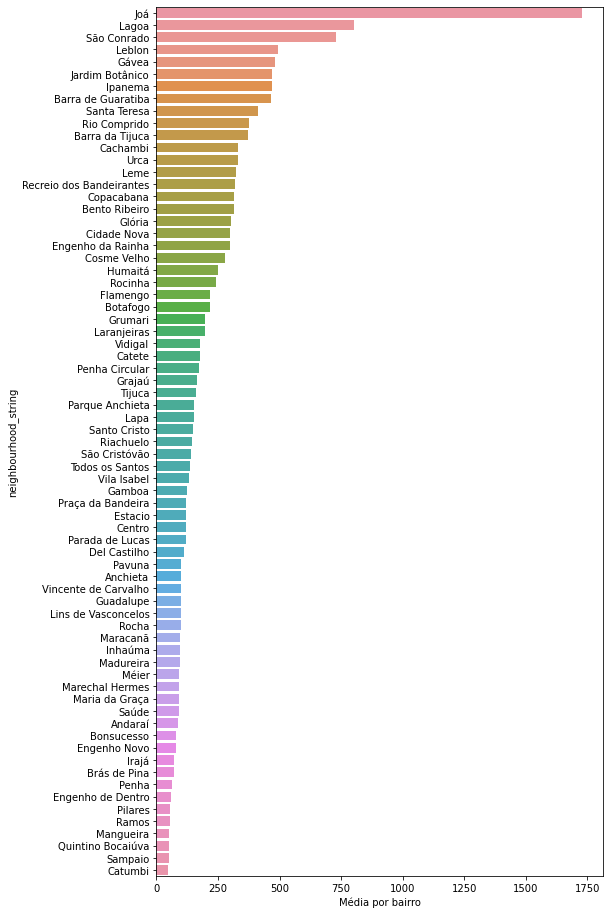

In [31]:
# Exibindo a média de preços dos anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood_string")["price"].mean())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood_string', x='price', data=df_plot)
ax.set_xlabel('Média de preço por bairro')

Text(0.5, 0, 'Contagem de anúncios por bairro')

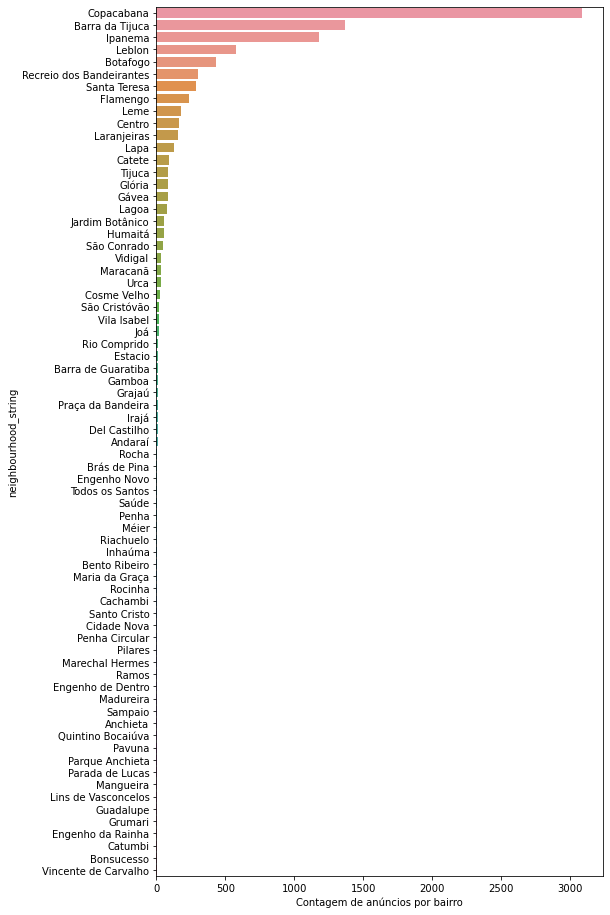

In [33]:
# Exibindo a contagem de anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood_string")["price"].count())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood_string', x='price', data=df_plot)
ax.set_xlabel('Contagem de anúncios por bairro')

In [ ]:
# O bairro do Joá produziu uma distorção nas estatísticas, pois possui poucos anúncios, porém com uma média de valores bastante alta.
# Além disso, observamos uma grande quantidade de bairros com poucos anúncios, o que poderia causar distorções semelhantes.
# Outros exemplos: Barra de Guaratiba, Rio Comprido e Bento Ribeiro.
# Pelo conhecimento do negócio, é sabido que essas regiões não possuem um valor condizente com suas respectivas médias.
# Portanto, decidiremos por analisar apenas os 20 bairros com a maior quantidade de anúncios, para evitar esse tipo de distorção.